<a href="https://colab.research.google.com/github/serlysetyani/Forensic-Digital_Duplication-Region/blob/main/Forensic_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

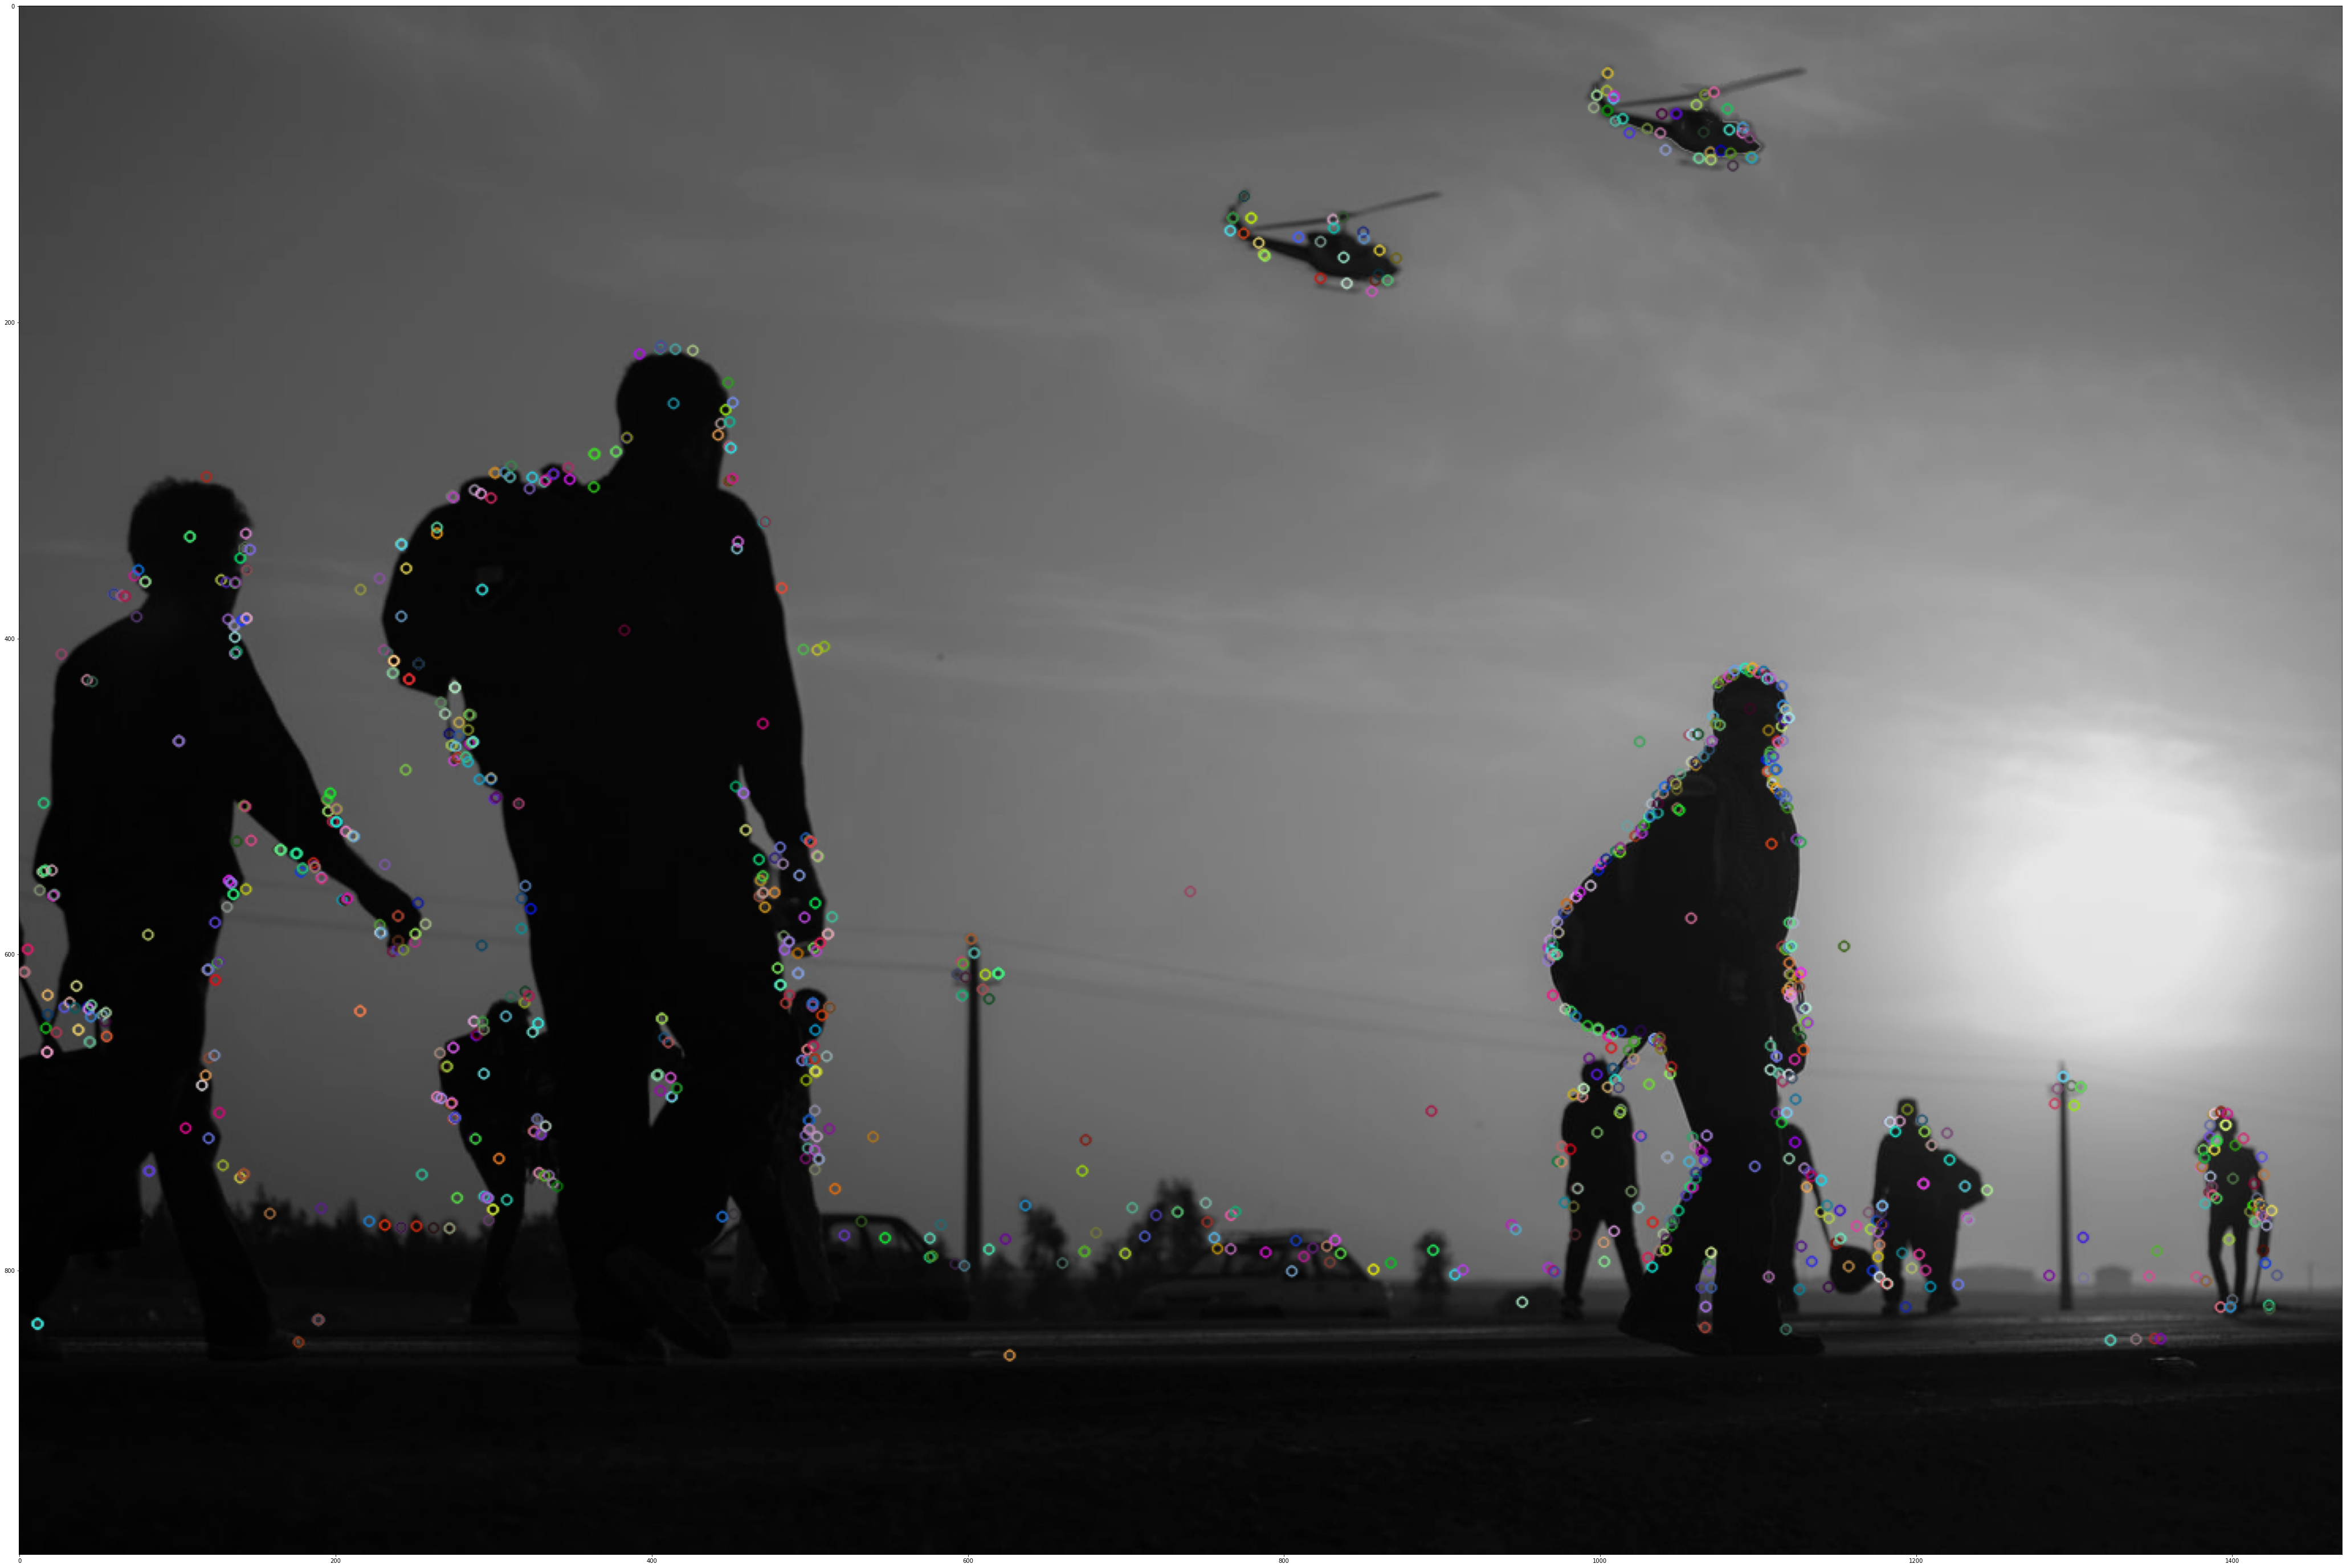

In [1]:
# Finding Image Keypoints using SIFT
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#reading image
# image 1
img1 = cv2.imread('photo-1559736220-66fc1882555d-F2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# image 2
img2 = cv2.imread('photo-1559736220-66fc1882555d-O.jfif')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create(nfeatures=1000, nOctaveLayers=7, sigma=1.6)
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

# Draw Keypoints
img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.figure(figsize = (100,50))
plt.imshow(img_1)

In [2]:
# Banyak Keypoints
print("Banyak keypoints dari gambar adalah:", len(keypoints_1), "\n")

Banyak keypoints dari gambar adalah: 983 



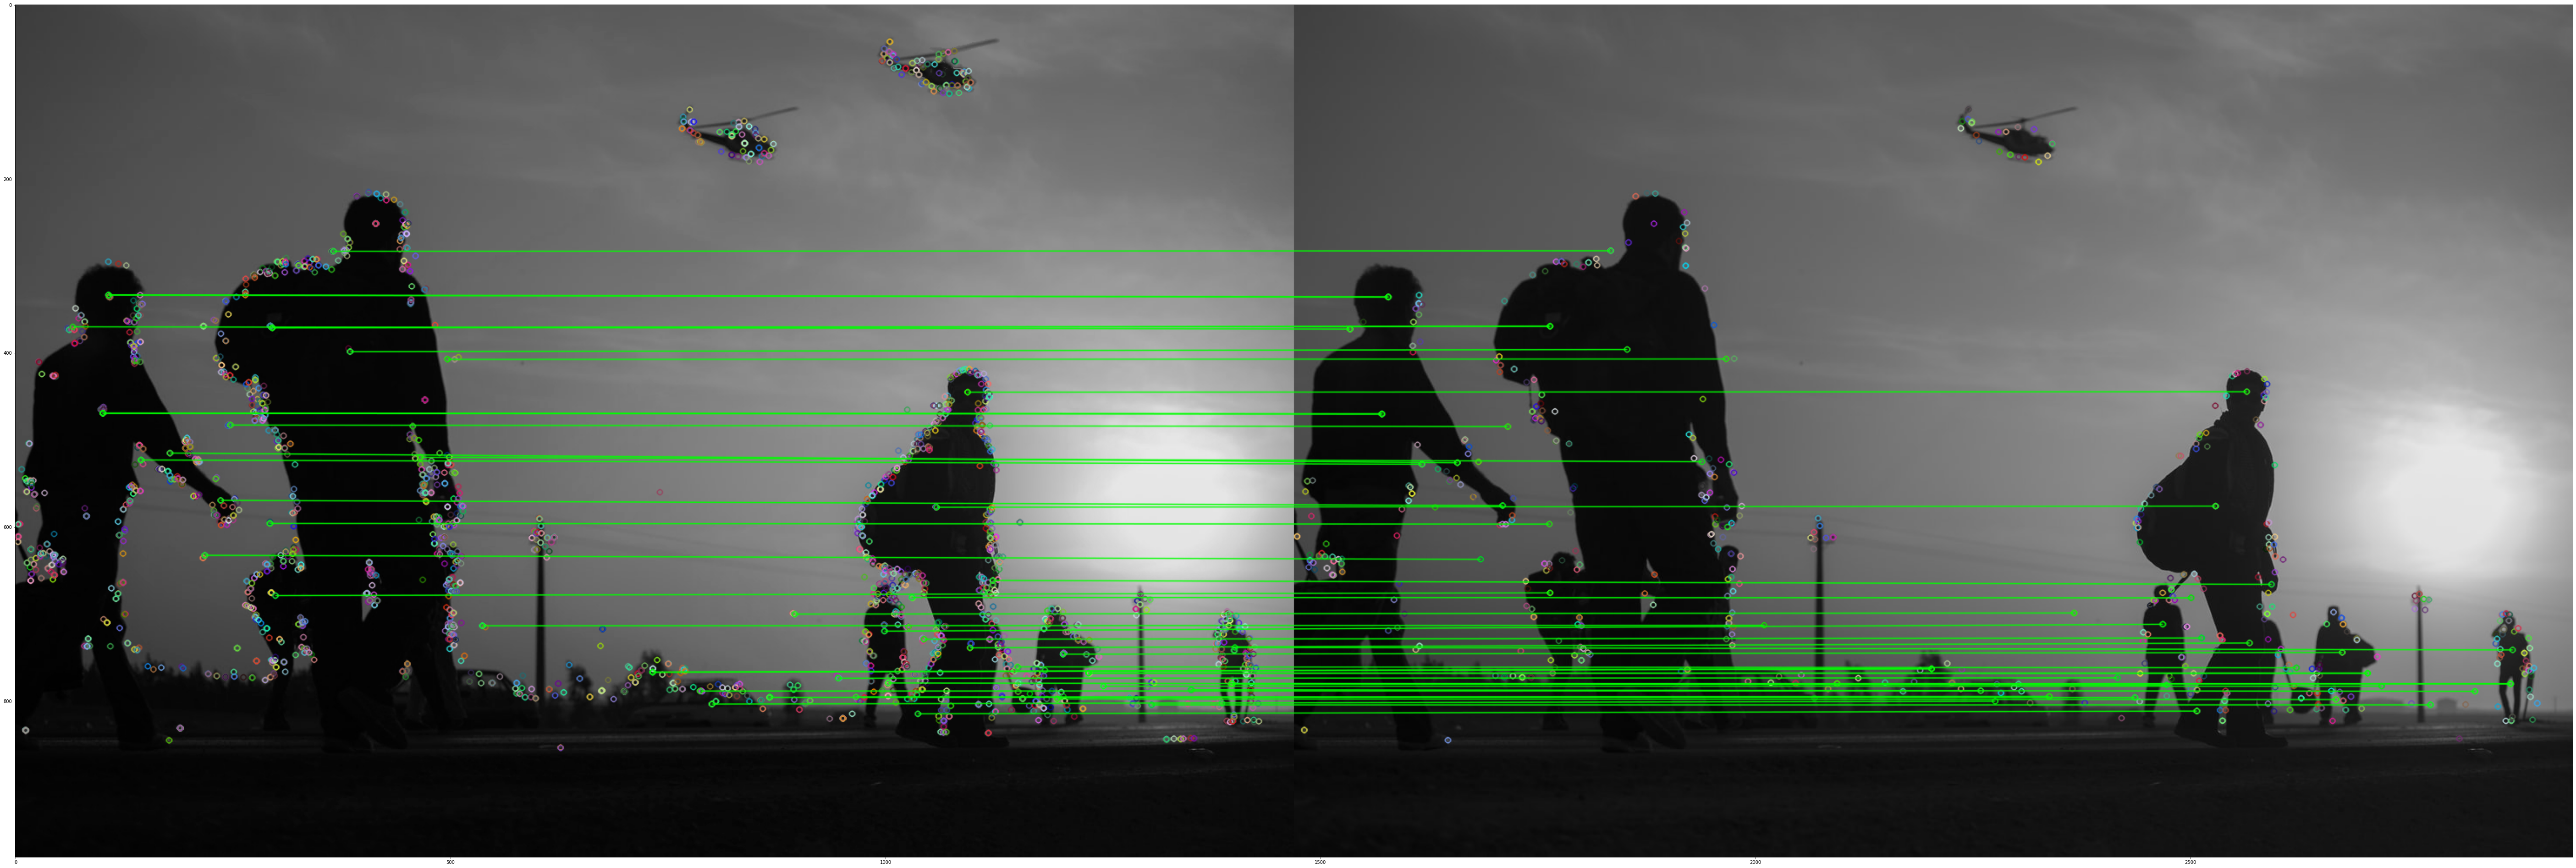

In [3]:
# sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
matches = cv2.BFMatcher().knnMatch(descriptors_1, descriptors_2, k=2)
good = [[m] for m, n in matches if m.distance < 0.5 * n.distance]
img3 = cv2.drawMatchesKnn(img1, keypoints_1, img2, keypoints_2, good, None, matchColor=(0, 255, 0), matchesMask=None, flags=0)
plt.figure(figsize = (100,50))
plt.imshow(img3)

In [10]:
# Affine Transform


# References

Keypoints: https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/
Features Matching Knn: https://www.programcreek.com/python/example/89342/cv2.drawMatchesKnn